PCA is used here to answer two questions: <br>
1) Is NOx concentration at one monitoring site explained by NOx concentration at another monitoring site? (i.e how paired are these monitoring sites?) <br>
2) Does month, temperature, or precipitation explain the NOx concentration at each monitoring site?

In [10]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_excel('BHL PCA.xlsx', sheet_name='Monthly ppt and temp_trimmed')
dataset.head()

,Year,Month,Precip (cm),Temp (C),S11 NOx (mg/L),S12 NOx (mg/L),T12 NOx (mg/L)
0,2015,3,1.4732,3.000000,49.881450,10.88840,13.020500
1,2015,4,11.3538,10.000000,46.129780,12.33426,13.993825
2,2015,5,11.6332,14.611111,45.923850,10.41450,15.625580
3,2015,6,19.4056,20.666667,37.787071,8.63195,16.626840
4,2015,7,24.0792,21.833333,26.937750,5.19046,16.490175


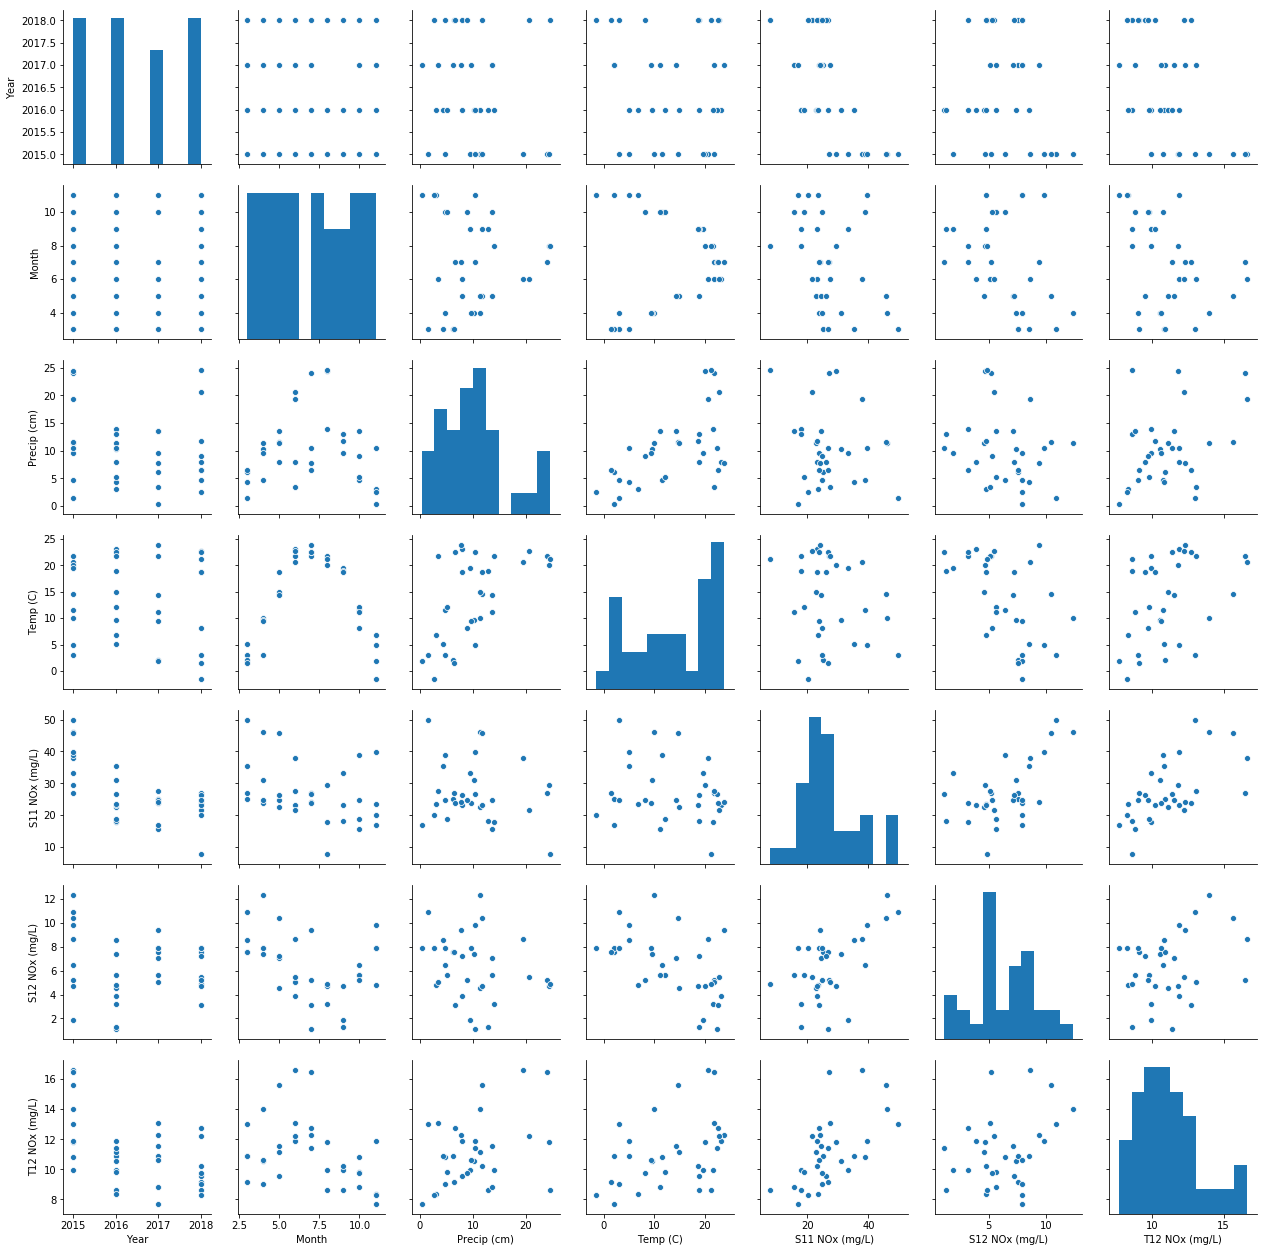

In [61]:
feature_list = list(dataset.columns[0:7])
feature = dataset[feature_list]
sns.pairplot(feature)

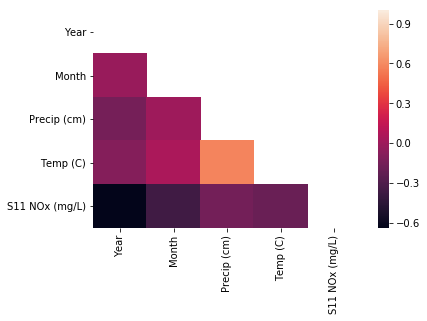

In [54]:
corr = feature.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)

In [55]:
from sklearn.preprocessing import StandardScaler

X_data = feature.iloc[:,1:7]
Y_data = feature.iloc[:,0]

scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


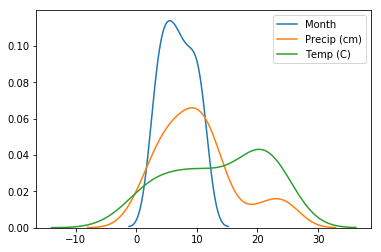

In [56]:
sns.kdeplot(X_data.iloc[:,0])
sns.kdeplot(X_data.iloc[:,1])
sns.kdeplot(X_data.iloc[:,2])

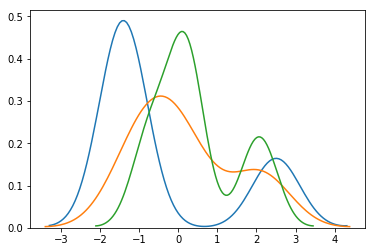

In [57]:
sns.kdeplot(scaled_X[0])
sns.kdeplot(scaled_X[1])
sns.kdeplot(scaled_X[2])

In [58]:
from sklearn.decomposition import PCA
pcal = PCA(n_components =6)
pcal.fit(scaled_X)
trained_pcal = pcal.transform(scaled_X)

trained_pcal.shape

ValueError: n_components=6 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

In [59]:
pc_df = pd.DataFrame(data=trained_pcal, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pc_df['Cluster'] = Y_data
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,3.868200,-0.611859,0.066321,-0.651051,-0.388765,-0.127480,2015
1,3.379502,0.810114,0.359696,0.540361,0.046123,-0.457619,2015
2,2.878889,1.591482,0.793815,-0.036535,0.115449,-0.031200,2015
3,1.553600,2.841417,0.794184,0.478834,0.230605,0.324847,2015
4,-0.176765,3.209630,0.507391,0.694403,-0.031414,1.035373,2015
5,-0.934691,1.939843,0.434161,0.927017,-0.890290,-0.283300,2015
6,-1.266688,0.236986,0.685185,-1.225202,-0.975322,-0.439531,2015
7,0.454597,-0.740381,1.533766,-0.703995,-0.368244,-0.349891,2015
8,1.312375,-0.644883,2.124906,0.845932,-0.256267,-0.086527,2015
9,2.007293,-0.873419,-0.887859,-0.280506,-0.312224,-0.060460,2016


In [60]:
df = pd.DataFrame({'var':pcal.explained_variance_ratio_, 'PC':['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6'], 
                   'PC_feature':['Month','Precip','Temp', 'S11 NOx ', 'S12 NOx ', 'T12 NOx ']})
df

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

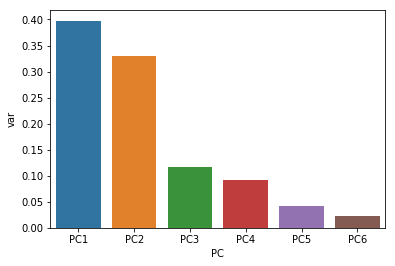

In [50]:
sns.barplot(x='PC', y='var', data=df)

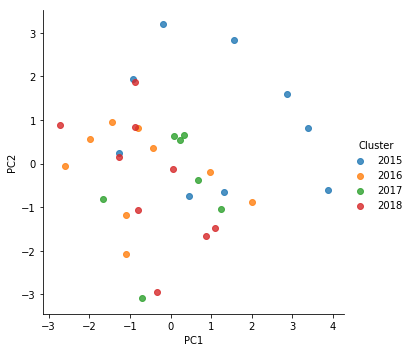

In [51]:
p = sns.lmplot(x='PC1', y='PC2', data=pc_df, hue="Cluster", fit_reg=False, legend=True)